序列 X1 X2 类别
1 -0.1 -0.2 -1
2 0.5 0.5 1
3 -0.5 0.2 -1
4 -0.2 0.5 -1
5 0.2 0.1 1
6 0.0 0.8 1


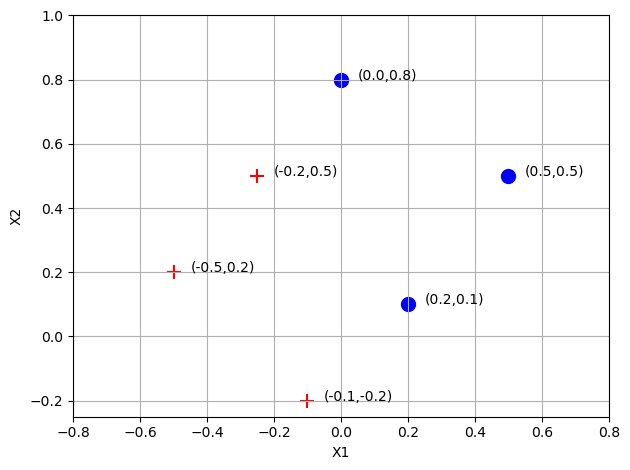

In [1]:
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *
xdim = [(-0.1,-0.2), (0.5,0.5), (-0.5,0.2),(-0.25,0.5),(0.2,0.1),(0,0.8)]
ldim = [-1,1,-1,-1,1,1]
print("序列", "X1", "X2", "类别")
count = 0
for x,l in zip(xdim, ldim):
    count += 1
    print("%d %3.1f %3.1f %d"%(count, x[0], x[1], l))
    if l > 0:
        marker = 'o'
        color = 'blue'
    else:
        marker = '+'
        color = 'red'
    plt.scatter(x[0], x[1], marker=marker, c=color, s=100)
    plt.text(x[0]+0.05,x[1],'(%3.1f,%3.1f)'%(x[0],x[1]))
plt.axis([-0.8, 0.8,-0.25, 1])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.tight_layout()
plt.show()

#### 实例函数实现

In [2]:
import sys,os,math,time
import matplotlib.pyplot as plt
from numpy import *

wb = [0,0,0] # wb:[b, w1, w2]
eta = 0.5    # eta: learning rate

xdim = [(-0.1,0.3), (0.5,0.7), (-0.5,0.2),(-0.7,0.3),(0.7,0.1),(0,0.5)]
ddim = [1,-1,1,1,-1,1]

def sigmoid(x):
    return 1.0/(1.0 + exp(-x))

# add learning rate compared to the example above

def hebbian(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+o*xx for ww,xx in zip(w,x1)]
    return w1

def perceptron(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = 1 if net >= 0 else -1
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1


def delta(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    o1 = o*(1-o)
    w1 = [ww+(d-o)*o1*xx for ww,xx in zip(w,x1)]
    return w1


def widrawhoff(w,x,d,eta):
    x1 = [1,x[0],x[1]]
    net = eta * sum([ww*xx for ww,xx in zip(w, x1)])
    o = sigmoid(net)
    w1 = [ww+(d-o)*xx for ww,xx in zip(w,x1)]
    return w1

def correlation(w, x, d, eta):
    x1 = [1, x[0], x[1]]
    w1 = [ww + eta * d * xx for ww, xx in zip(w, x1)]
    return w1



#### Result Encapusulation

In [3]:
def Result_Encapsulation(wb, eta, xdim, ddim, func):
    weights = [wb.copy()]
    for epoch in range(2): 
        for x, d in zip(xdim, ddim):
            wb = func(wb, x, d, eta)
    print(f"{func.__name__}: {[f'{w:.6f}' for w in wb]}")
    return wb, func.__name__

def visualize_results(results):
    plt.figure(figsize=(10, 8))
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink']
    
    for i, (wb, func_name) in enumerate(results):
        color = colors[i % len(colors)]
        plt.scatter(wb[0], wb[1], c=color, label=func_name)
        plt.text(wb[0], wb[1], f'({wb[0]:.4f}, {wb[1]:.4f})\n{func_name}', fontsize=9, color=color)
    
    plt.xlabel('w1')
    plt.ylabel('w2')
    plt.title('Final Weight Coefficients after 2 Iterations')
    plt.legend()
    plt.grid(True)
    plt.show()


#### Results Visualization

hebbian: ['9.795404', '-0.162602', '3.417382']
perceptron: ['2.000000', '-3.000000', '-0.400000']
delta: ['-0.391426', '-1.180227', '-0.242030']
widrawhoff: ['-0.938636', '-4.476576', '-0.748882']
correlation: ['2.000000', '-2.500000', '0.500000']


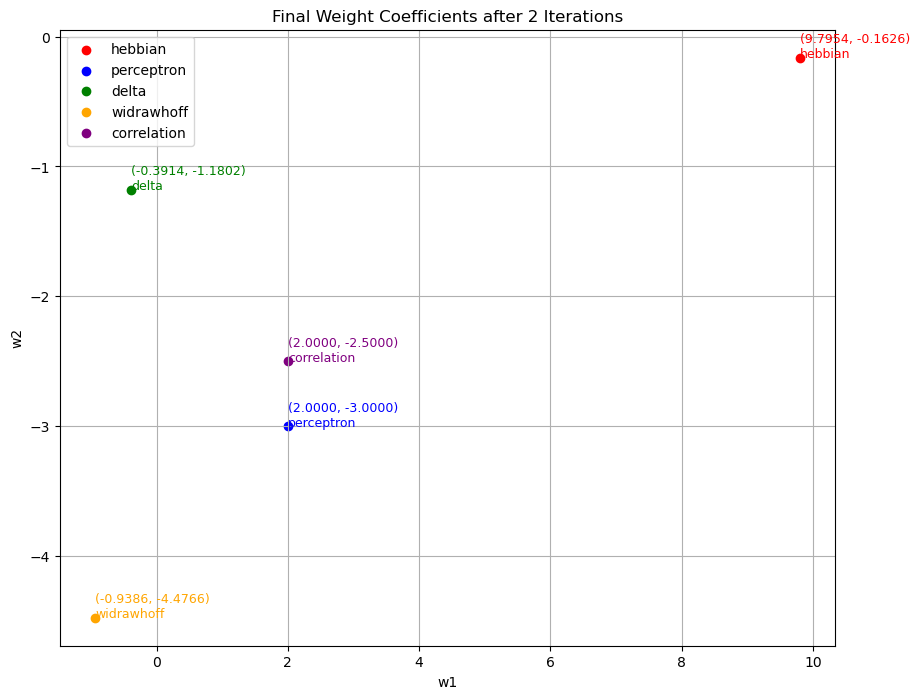

In [4]:
results = []
results.append(Result_Encapsulation(wb,eta,xdim,ddim,hebbian))
results.append(Result_Encapsulation(wb,eta,xdim,ddim,perceptron))
results.append(Result_Encapsulation(wb,eta,xdim,ddim,delta))
results.append(Result_Encapsulation(wb,eta,xdim,ddim,widrawhoff))
results.append(Result_Encapsulation(wb,eta,xdim,ddim,correlation))
visualize_results(results)


## 不同算法对神经元权系数的影响
从图中可以看出Hebbian算法作为无监督学习规则，对于权重系数的改变与有监督方法有明显差异，$\omega_2$值明显离群。Percetron算法、Delta算法、Widrow-Hoff LMS算法结果相仿，其中Percetron算法更新最明显；其中Delta算法是根据梯度进行迭代更新的，更新相对最小；Widrow-Hoff LMS算法相当于激活函数是1的Delta算法，所以无需求导，权重更新相对明显。Correlation算法为死记忆学习，权重更新在所有算法中最明显